In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# shape
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical columns

 . Survived
 . Pclass
 . Sex
 . SibSp
 . Parch
 . Embarked


# Numerical columns

 . Age
 . Fare
 . Passengerid


# Mixed columns

 . Name
 . Ticket
 . Cabin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Few conclusions 
#1. Missing vlaues in Age, Cabin and Embarked columns
#2. More than 70 percent values are missing in cabin columns, will have to drop
#3. Few columns have inappropriate data types

In [9]:
# Dropping cabin column 
df.drop(columns=['Cabin'],inplace=True)

In [10]:
# Imputting missing value for age 
# Strategy - mean

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
# Imputtind missing values for embarked 
# findind the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is
df['Embarked'].fillna('S', inplace=True)

In [12]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [16]:
# Five point Summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
for col in ['Age','SibSp','Parch','Fare']:
  min_val, max_val = df[col].min(), df[col].max()

  print(f'minimum value of {col} is {min_val} and maximum value of {col} is {max_val}')

minimum value of Age is 0 and maximum value of Age is 80
minimum value of SibSp is 0 and maximum value of SibSp is 8
minimum value of Parch is 0 and maximum value of Parch is 6
minimum value of Fare is 0.0 and maximum value of Fare is 512.3292


In [18]:
for col in ['SibSp','Parch','Pclass','Sex','Embarked']:
  vals = df[col].unique()

  print(f'unique values/classes in {col} are {vals}')

unique values/classes in SibSp are [1 0 3 4 2 5 8]
unique values/classes in Parch are [0 1 2 5 3 4 6]
unique values/classes in Pclass are [3, 1, 2]
Categories (3, int64): [1, 2, 3]
unique values/classes in Sex are ['male', 'female']
Categories (2, object): ['female', 'male']
unique values/classes in Embarked are ['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']


# Univariate Analysis

out of 891 62 percent people died in the accident


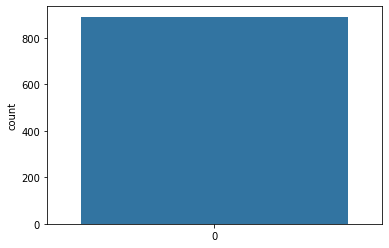

In [7]:
sns.countplot(df['Survived'])
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("out of 891 {} percent people died in the accident".format(death_percent))

<AxesSubplot: ylabel='Survived'>

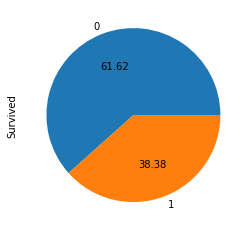

In [8]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

0    549
1    342
Name: Survived, dtype: int64

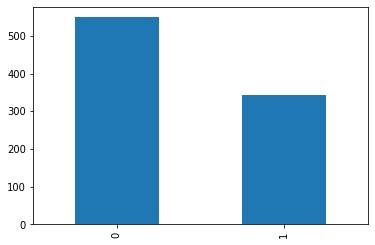

In [20]:

df.Survived.value_counts().plot(kind='bar')
df.Survived.value_counts()

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot: ylabel='count'>

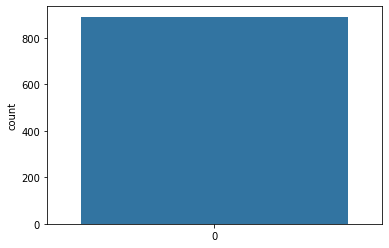

In [21]:
# Pclass column
print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\2904690667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pclass)


<AxesSubplot: xlabel='Pclass', ylabel='Density'>

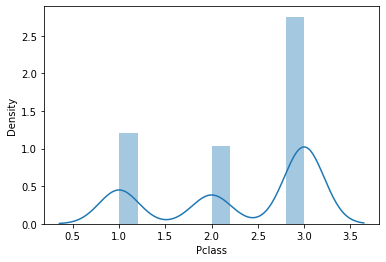

In [22]:
sns.distplot(df.Pclass)

male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot: ylabel='count'>

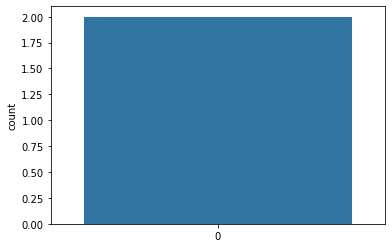

In [23]:
# for Gender
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64

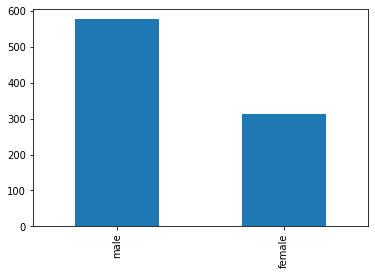

In [24]:
df.Sex.value_counts().plot(kind='bar')
df.Sex.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot: ylabel='count'>

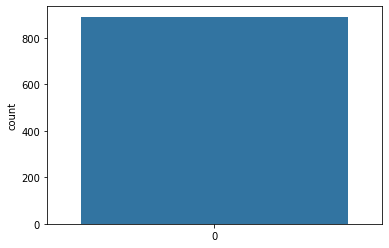

In [25]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\1634579339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])


<AxesSubplot: xlabel='SibSp', ylabel='Density'>

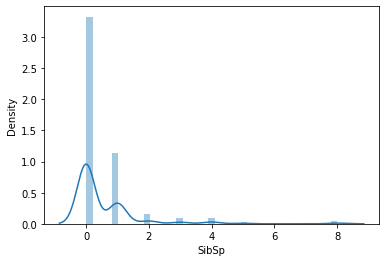

In [26]:
sns.distplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<AxesSubplot: ylabel='count'>

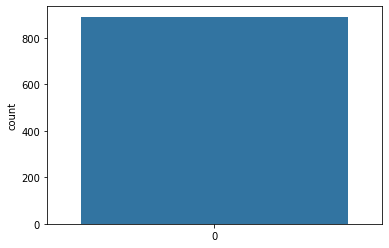

In [27]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\63704092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Parch'])


<AxesSubplot: xlabel='Parch', ylabel='Density'>

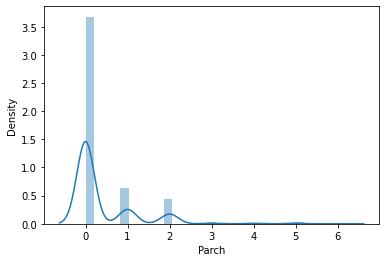

In [28]:
sns.distplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<AxesSubplot: ylabel='count'>

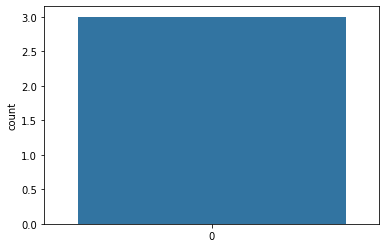

In [29]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'].value_counts())

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\2094239408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Embarked'].value_counts())


<AxesSubplot: xlabel='Embarked', ylabel='Density'>

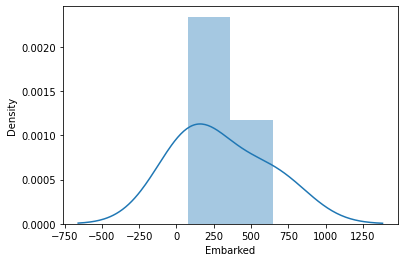

In [30]:
sns.distplot(df['Embarked'].value_counts())

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\178786589.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

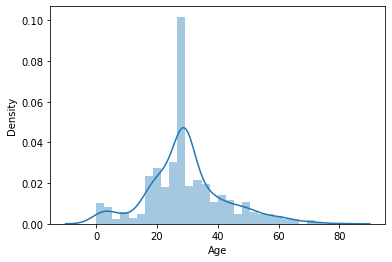

In [31]:
# Age column
sns.distplot(df['Age'])

<AxesSubplot: >

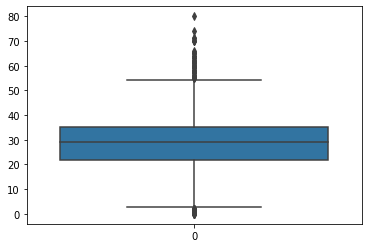

In [32]:
sns.boxplot(df['Age'])

In [33]:
print("People with age in between 60 and 70 are",df[(df['Age']>60)& (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70)& (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('People with age between 0 and 1',df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
People with age between 0 and 1 7


C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\2942046018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

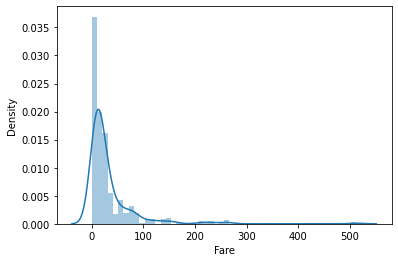

In [34]:
# Fare column
sns.distplot(df['Fare'])

In [35]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<AxesSubplot: >

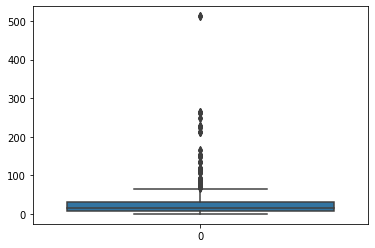

In [36]:
sns.boxplot(df['Fare'])

In [37]:
print("People with fare in between $200 and $300", df[(df['Fare']>200)&(df['Fare']<300)].shape[0])
print("People with fare n greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare n greater than $300 3


# Conclusion

## Highly skewed data, a lot of people had cheaper tickets
## Outliers are there in the data

<AxesSubplot: xlabel='Sex', ylabel='Fare'>

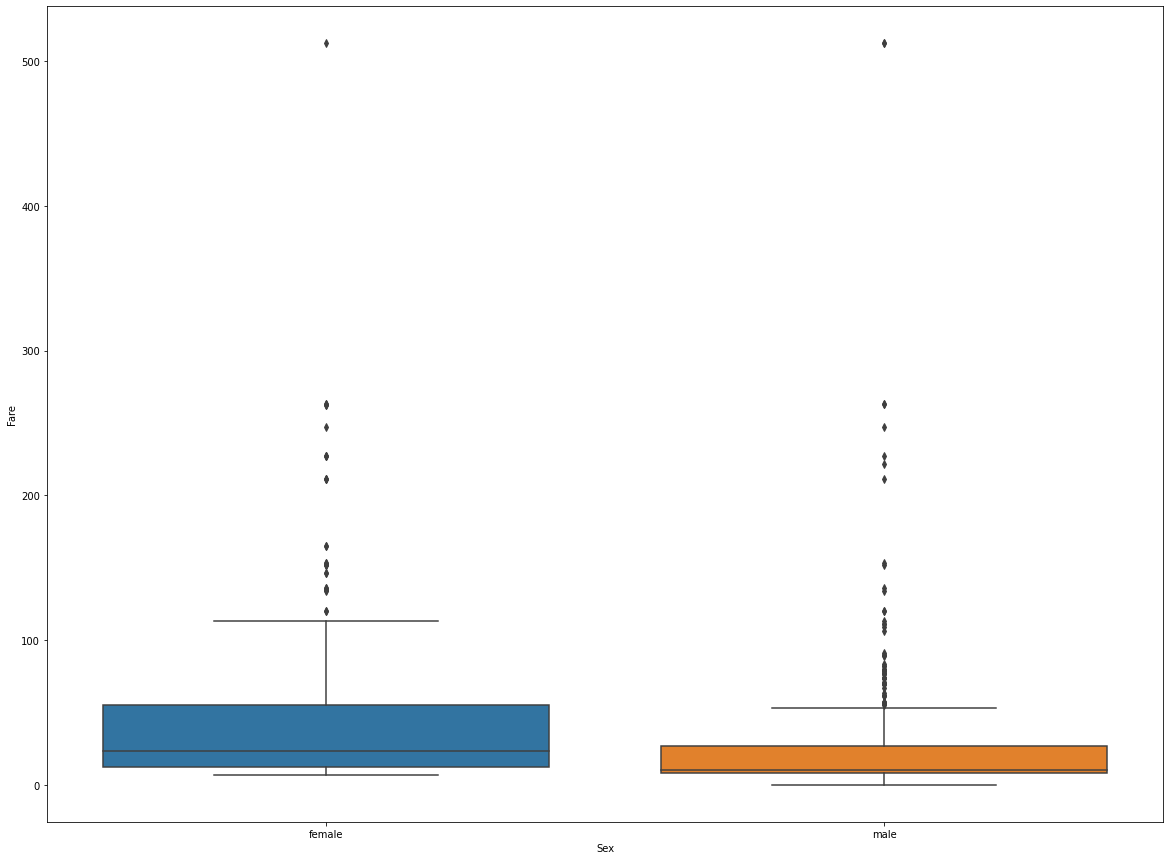

In [38]:
# Bivariate analysis

# Fare with Sex 
plt.figure(figsize=(20,15))
sns.boxplot(x='Sex', y='Fare', data=df)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Embarked,,,,,,,,,,,,,,,,,,,,,
C,0.0,0.6,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.6,0.0,2.4,1.2,1.2,0.0,1.8
Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,1.3,1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S,2.3,0.0,0.2,0.2,0.0,0.2,0.3,0.0,0.0,0.0,...,0.5,0.3,0.5,0.0,0.2,0.0,0.0,0.0,0.6,0.0


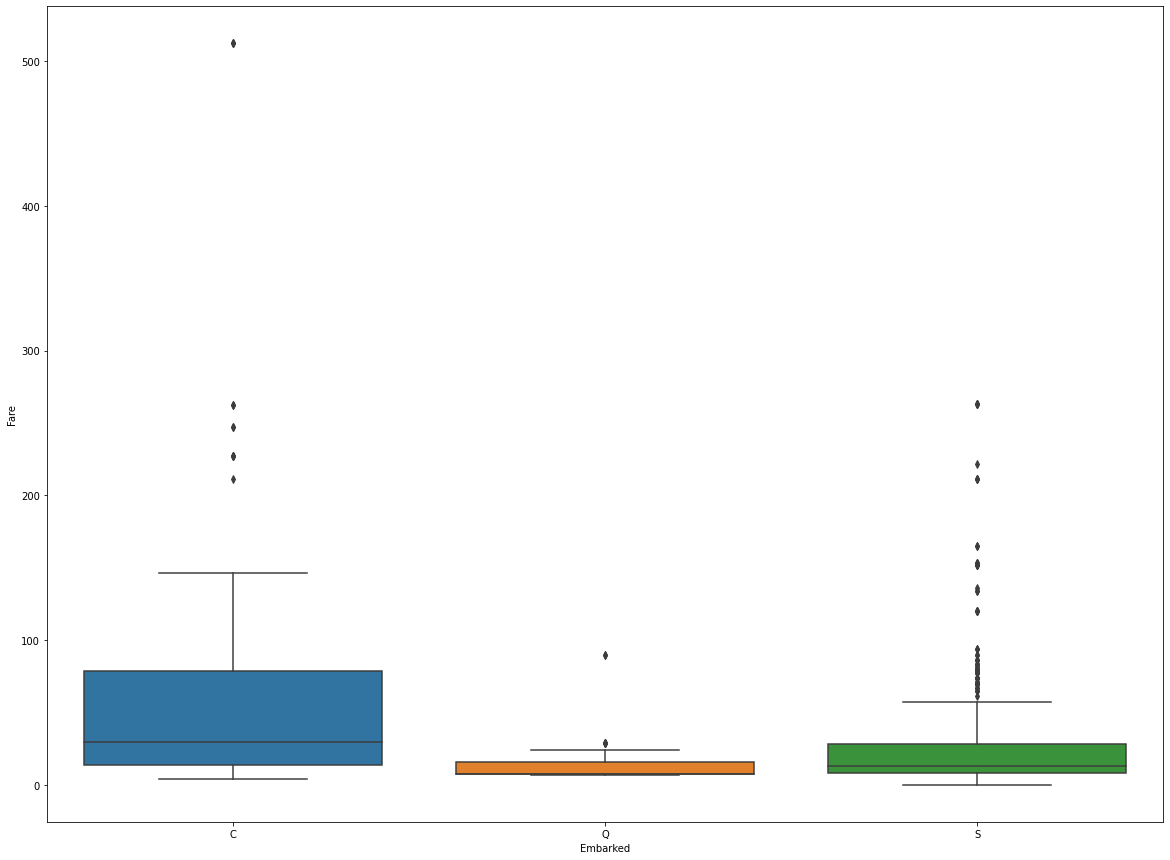

In [39]:
# Fare with Embarked
plt.figure(figsize=(20,15))
sns.boxplot(x='Embarked', y='Fare', data=df)

pd.crosstab(df['Embarked'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,2.6,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.2,0.2,...,0.2,0.0,0.0,0.2,0.2,0.2,0.2,0.0,0.4,0.0
1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.6,0.9,0.0,0.0,0.9,0.3,0.6,0.6,0.9


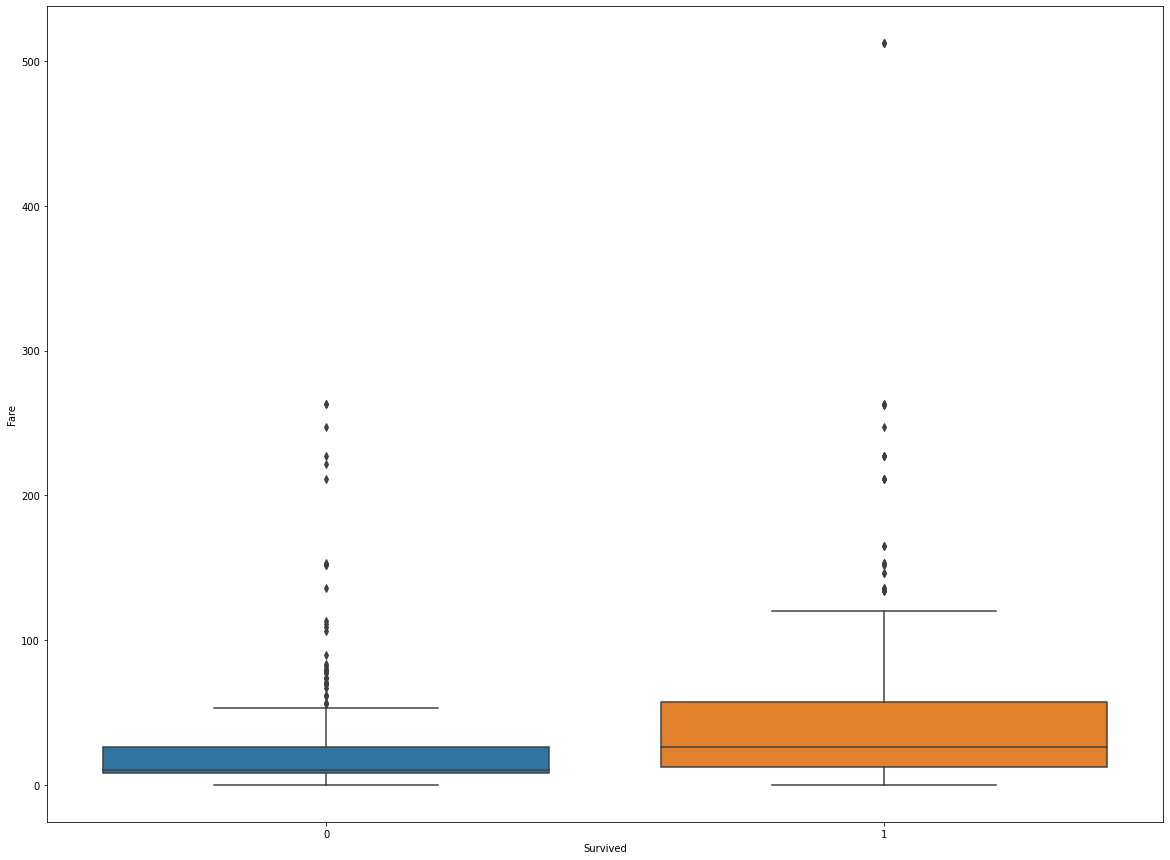

In [40]:
# Fare with Survived
plt.figure(figsize=(20,15))
sns.boxplot(x='Survived', y='Fare', data=df)

pd.crosstab(df['Survived'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Pclass,,,,,,,,,,,,,,,,,,,,,
1,2.3,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.4,0.9,1.4,0.5,0.5,1.9,0.9,0.9,1.9,1.4
2,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.2,0.0,0.2,0.2,0.2,0.4,0.4,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


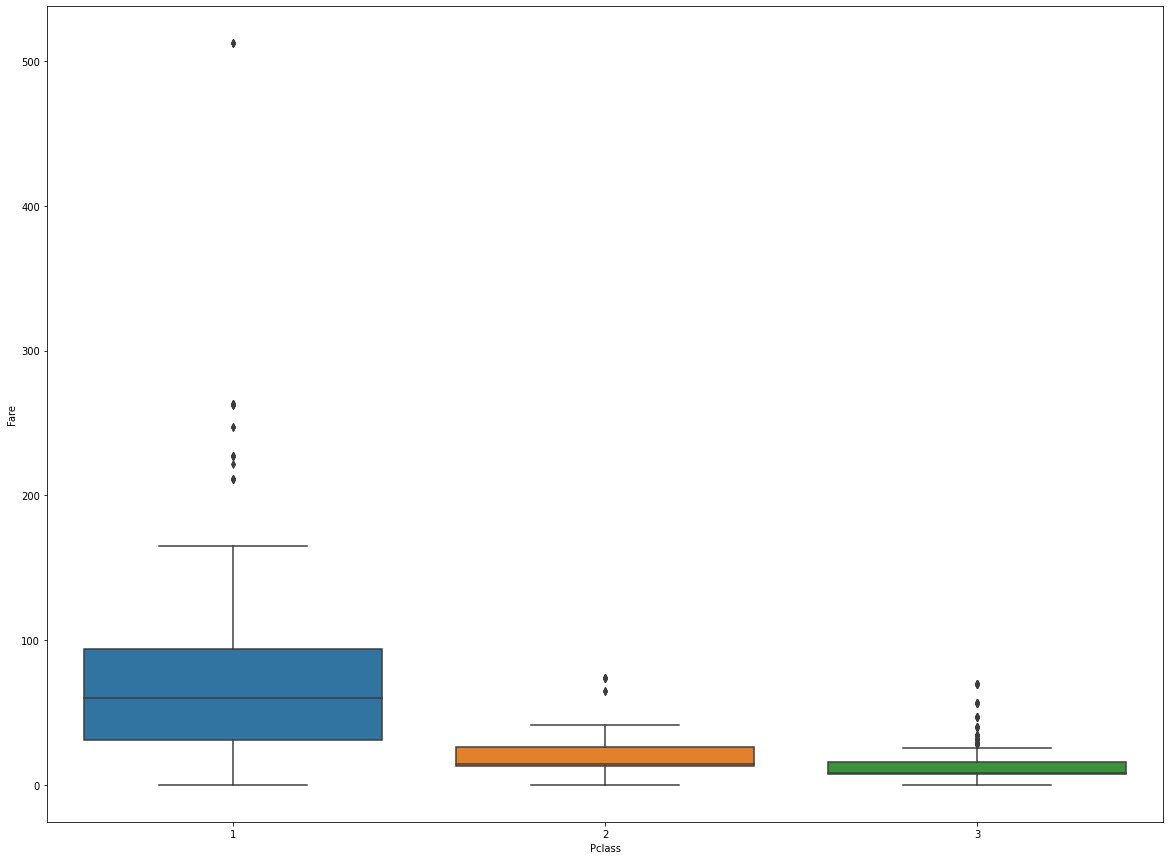

In [41]:
# Fare with Pclass
plt.figure(figsize=(20,15))
sns.boxplot(x='Pclass', y='Fare', data=df)

pd.crosstab(df['Pclass'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Parch,,,,,,,,,,,,,,,,,,,,,
0,2.2,0.1,0.1,0.1,0.1,0.1,0.3,0.3,0.1,0.1,...,0.1,0.0,0.1,0.0,0.1,0.6,0.0,0.0,0.0,0.3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.7,0.8,1.7,0.0,0.0,0.0,1.7,0.0,0.0,0.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.2,0.0,1.2,0.0,0.0,0.0,2.5,3.8,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


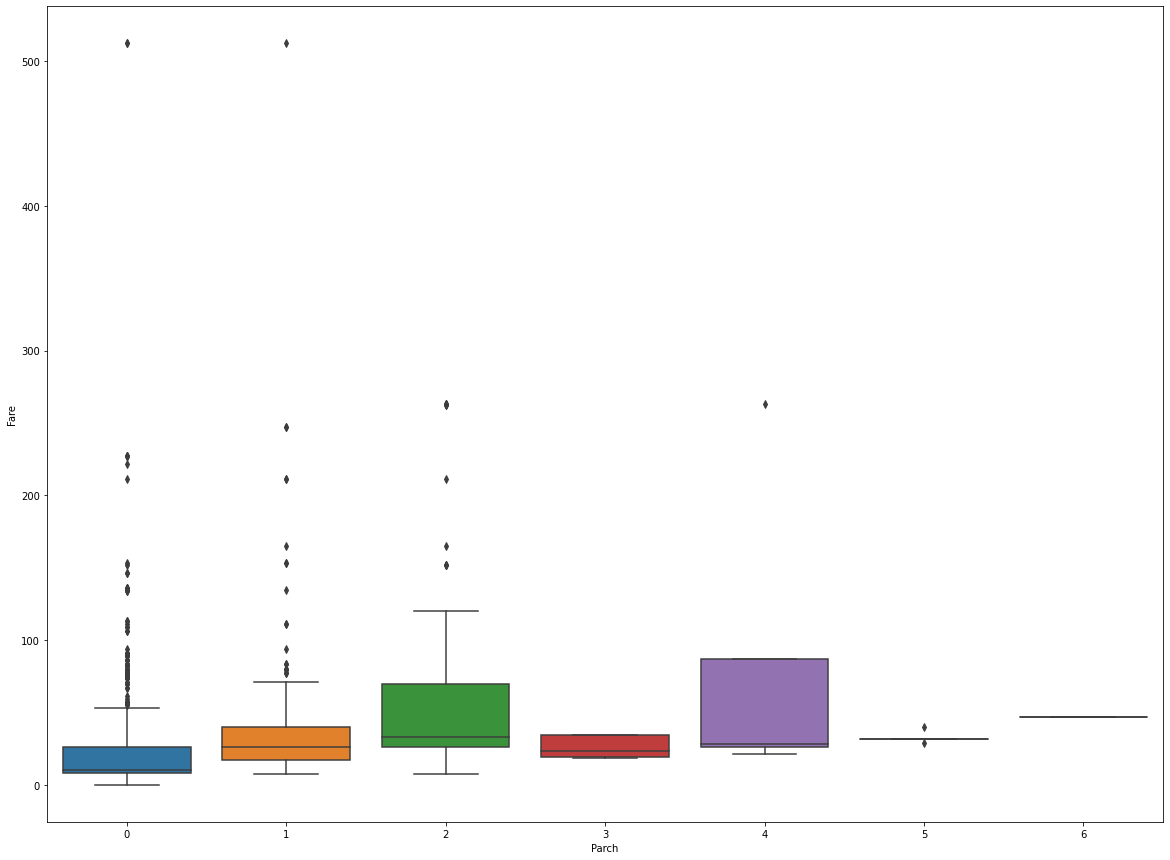

In [42]:
# Fare with Parch
plt.figure(figsize=(20,15))
sns.boxplot(x='Parch', y='Fare', data=df)

pd.crosstab(df['Parch'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
SibSp,,,,,,,,,,,,,,,,,,,,,
0,2.5,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.2,...,0.5,0.2,0.5,0.2,0.2,0.5,0.3,0.0,0.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.1,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.8,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


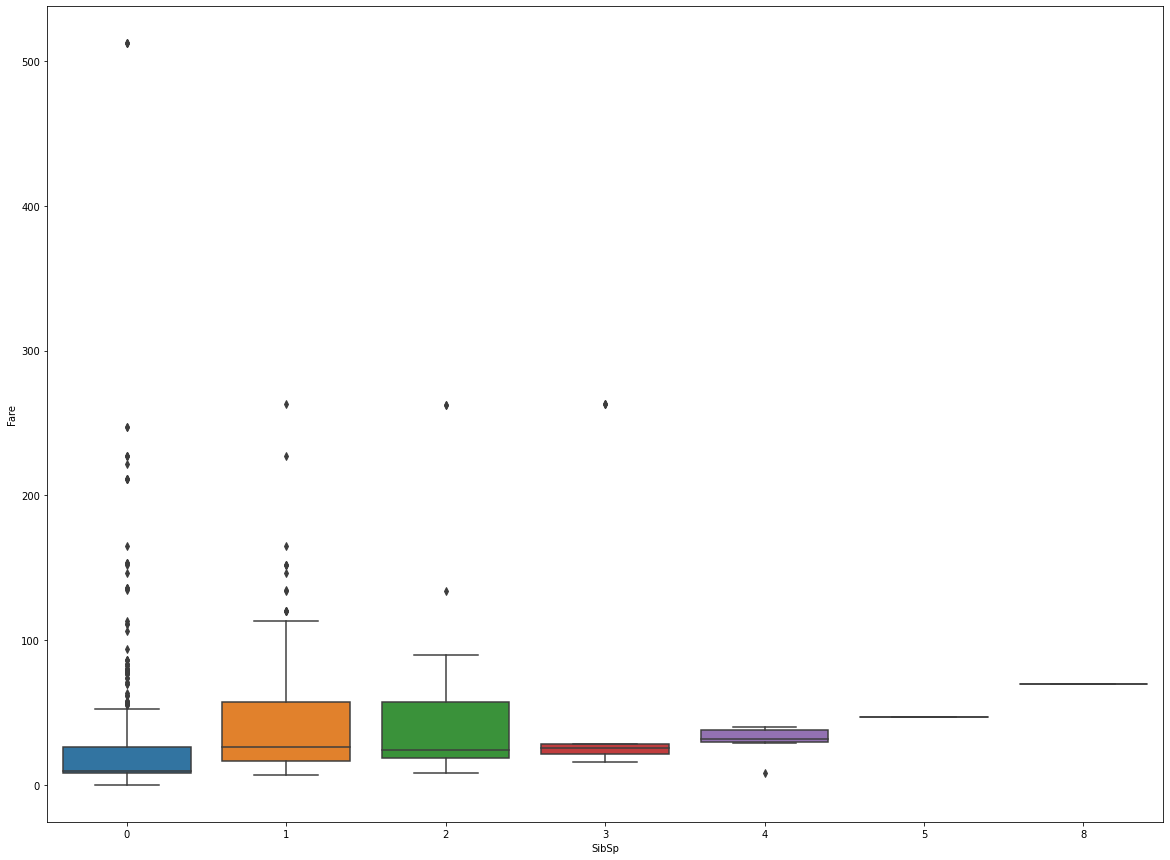

In [43]:
# Fare with SibSp
plt.figure(figsize=(20,15))
sns.boxplot(x='SibSp', y='Fare', data=df)

pd.crosstab(df['SibSp'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\1147318021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Age'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\1147318021.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

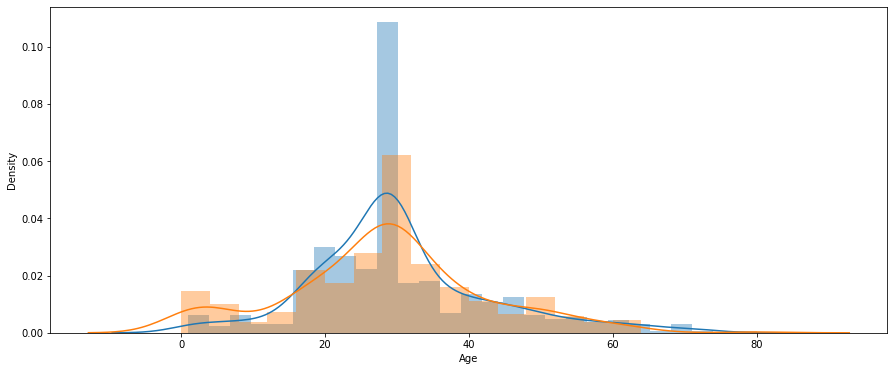

In [44]:
# Survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\1060383329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]['Fare'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5848\1060383329.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

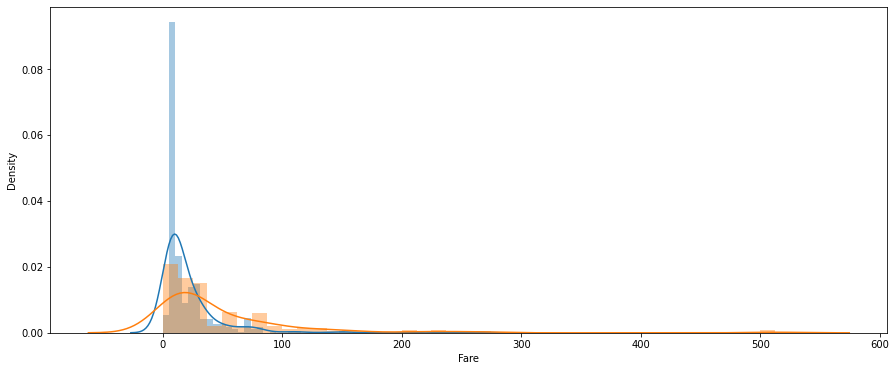

In [45]:
# Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [46]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.232743,1.000000,0.414838,0.159651
Parch,-0.176744,0.414838,1.000000,0.216225
Fare,0.093856,0.159651,0.216225,1.000000


<AxesSubplot: title={'center': 'correlation of Numerical Variable including Target variable'}>

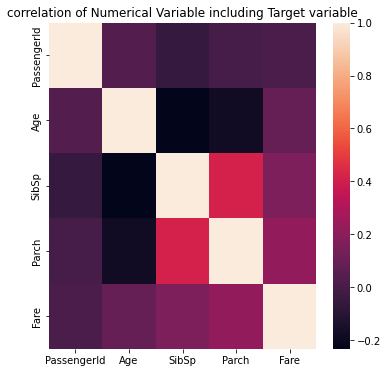

In [19]:
f, ax = plt.subplots(figsize= (6,6))
plt.title("correlation of Numerical Variable including Target variable")
sns.heatmap(df.corr())

In [237]:
df[df.Sex =='male'].Fare.median(), df[df.Sex == 'female'].Fare.median()

(10.5, 23.0)

In [238]:
df[df.Sex =='male'].Fare.mean(), df[df.Sex == 'female'].Fare.mean()

(25.523893414211443, 44.47981783439491)

In [20]:
df['family_size']=df['Parch']+df['SibSp']

In [21]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
673,674,1,2,"Wilhelms, Mr. Charles",male,31,0,0,244270,13.0000,S,0
90,91,0,3,"Christmann, Mr. Emil",male,29,0,0,343276,8.0500,S,0
335,336,0,3,"Denkoff, Mr. Mitto",male,29,0,0,349225,7.8958,S,0
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28,1,1,347080,14.4000,S,2
476,477,0,2,"Renouf, Mr. Peter Henry",male,34,1,0,31027,21.0000,S,1


In [23]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0  and number<=4:
        return 'Medium'
    else:
        return'Large'

In [24]:
df['family_type']=df['family_size'].apply(family_type)

In [25]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51,0,0,347743,7.0542,S,0,Alone
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C,2,Medium
747,748,1,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13.0000,S,0,Alone
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34,0,0,363294,8.0500,S,0,Alone
603,604,0,3,"Torber, Mr. Ernst William",male,44,0,0,364511,8.0500,S,0,Alone


In [29]:
df.drop(columns=['SibSp','Parch','family_size'],inplace = True)

In [30]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
476,477,0,2,"Renouf, Mr. Peter Henry",male,34,31027,21.0000,S,Medium
810,811,0,3,"Alexander, Mr. William",male,26,3474,7.8875,S,Alone
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,29,W./C. 6609,7.5500,S,Alone
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,19950,263.0000,S,Large
760,761,0,3,"Garfirth, Mr. John",male,29,358585,14.5000,S,Alone


In [33]:
pd.crosstab(df['family_type'],df['Fare']).apply(lambda r: round((r/r.sum())*100,1), axis =1)

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
family_type,,,,,,,,,,,,,,,,,,,,,
Alone,2.8,0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.2,0.2,...,0.2,0.0,0.2,0.0,0.2,0.6,0.0,0.0,0.0,0.4
Large,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,0.0
Medium,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,...,0.7,0.7,0.7,0.3,0.0,0.3,0.7,0.7,0.0,0.3


# Detecting Ouliers

In [34]:
# outliers in age(almost normal)
df = df[df['Age']<(df['Age'].mean()+3*df['Age'].std())]
df.shape

(884, 10)

In [35]:
# outliers from Fare column
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3-Q1)
outlier_high=Q3 + 1.5 * (Q3-Q1)

df=df[(df['Fare']>outlier_low)&(df['Fare']<outlier_high)]


In [36]:
print((outlier_low),(outlier_high))

-26.70575 65.62344999999999


In [37]:
# Relationship between two independent categorical Variable
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(df.Survived, df.Fare, margins = True)
chi2_contingency(chisqt)

(336.0179599354168,
 0.9940800291626861,
 404,
 array([[9.88946684e+00, 6.59297789e-01, 6.59297789e-01, 6.59297789e-01,
         6.59297789e-01, 6.59297789e-01, 1.31859558e+00, 1.31859558e+00,
         6.59297789e-01, 6.59297789e-01, 1.31859558e+00, 6.59297789e-01,
         4.61508453e+00, 1.31859558e+00, 2.63719116e+00, 6.59297789e-01,
         7.91157347e+00, 9.88946684e+00, 8.57087126e+00, 6.59297789e-01,
         1.97789337e+00, 6.59297789e-01, 2.63719116e+00, 6.59297789e-01,
         2.63719116e+00, 6.59297789e-01, 6.59297789e-01, 2.63719116e+00,
         1.31859558e+00, 6.59297789e-01, 2.17568270e+01, 9.88946684e+00,
         6.59297789e-01, 3.95578674e+00, 6.59297789e-01, 1.31859558e+00,
         8.57087126e+00, 6.59297789e-01, 2.63719116e+00, 6.59297789e-01,
         2.50533160e+01, 1.18673602e+01, 6.59297789e-01, 2.83498049e+01,
         6.59297789e-01, 6.59297789e-01, 6.59297789e-01, 6.59297789e-01,
         6.59297789e-01, 6.59297789e-01, 6.59297789e-01, 6.59297789e-01,
    

In [38]:
chisqt

Fare,0.0,4.0125,5.0,6.2375,6.4375,6.45,6.4958,6.75,6.8583,6.95,...,56.9292,57.0,57.9792,59.4,61.175,61.3792,61.9792,63.3583,65.0,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,0,0,0,0,1,1,1,0,0,507
1,1,0,0,0,0,0,0,0,0,0,...,2,2,2,1,0,0,0,1,2,262
All,15,1,1,1,1,1,2,2,1,1,...,2,2,2,1,1,1,1,1,2,769


In [41]:
df.sample(4)

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,330877,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,0,0,1,0,0,0,0


In [42]:
df_new=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

<AxesSubplot: >

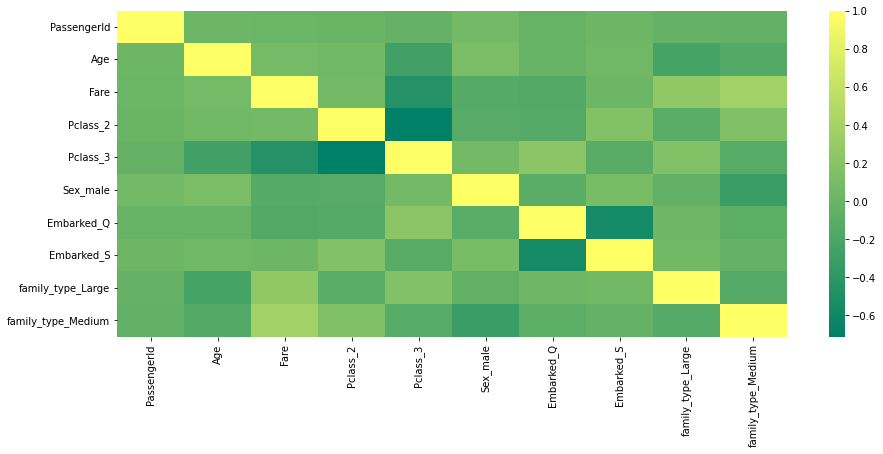

In [43]:
plt.figure(figsize=(15,6))
sns.heatmap(df_new.corr(), cmap='summer')

## Conclusion
#### 1.Chance of the female survival is higher than the male survival
#### 2.Somehow, people going to C survived more
#### 3.people in the age range of 20 to 40 had a higher chance of not surviving
#### 4.Travelling in Pclass 3 was dangerous

In [44]:
# dropping passengerid, name, ticket and cabin column
ddf= df_new.drop(['PassengerId','Name','Ticket'], axis =1)
ddf

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22,7.2500,0,1,1,0,1,0,1
2,1,26,7.9250,0,1,0,0,1,0,0
3,1,35,53.1000,0,0,0,0,1,0,1
4,0,35,8.0500,0,1,1,0,1,0,0
5,0,29,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0000,1,0,1,0,1,0,0
887,1,19,30.0000,0,0,0,0,1,0,0
888,0,29,23.4500,0,1,0,0,1,0,1
889,1,26,30.0000,0,0,1,0,0,0,0


In [175]:
pip install -U scikit-learn


     ---------------------------------------- 8.2/8.2 MB 1.5 MB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 737.8 kB/s eta 0:00:00


In [45]:

from sklearn.model_selection import train_test_split

X = ddf.drop('Fare', axis=1)
y = ddf['Fare']

# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_val)

71.1344722104286

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_val)

4.438157251146464

In [49]:
lin_reg.coef_  , lin_reg.intercept_ 

(array([  1.7380755 ,   0.02855299, -17.90044571, -23.73722577,
          0.96701205,  -1.17741491,  -0.56794692,  25.31554914,
         11.64863416]),
 30.352538385219837)

In [50]:
print(y_val.min(), y_val.max())
print(y_pred.min(), y_pred.max())

0.0 65.0
6.265934354859127 45.508856588401905


In [51]:
print(y_val, '\n\n', y_pred)

260     7.7500
824    39.6875
512    26.2875
771     7.8542
440    26.2500
        ...   
776     7.7500
304     8.0500
719     7.7750
669    52.0000
869    11.1333
Name: Fare, Length: 154, dtype: float64 

 [ 7.23294641 32.38703286 33.51758657  8.38492116 26.55573986 45.28110938
  7.84241439 32.35847988 14.59302283 34.15366135  7.84241439 26.609733
  8.21360323  9.63759587 32.06517373  7.92820614 13.39366457  8.86720912
 32.77588559 19.49104856 44.90924385  7.61399049 32.35847988 19.91934337
  7.92807336  7.49977854 33.88566258  7.87096738 13.50787652 15.56003489
 20.37632396  7.69964946  9.86601977 13.39366457 25.38506737 45.50885659
  8.47058012  9.18142476 19.40538959 20.20500603  7.72820244 13.62208847
 33.26060969 31.77756488 26.32352643  6.87540234  8.01373232  7.23294641
 14.53591686 24.30371058  7.98517933  8.41036131 25.47059355  8.67058382
 14.73565499 19.40538959  8.4389143  13.73630042 33.28916267  9.9485659
  7.84241439  8.29939498  8.35636817  7.89952037  9.29496002 10.0

In [52]:
# R square
lin_reg.score(X_val,y_val)

0.6450888562342361

In [54]:
# for adjusted R square
1-(1-lin_reg.score(X_val,y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.6229069097488757

In [9]:
from pandas_profiling import ProfileReport
prof= ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]